<a href="https://colab.research.google.com/github/Imgih/cat_vs_dog/blob/main/cachorro_vs_gato_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:09<00:00, 183MB/s]
100% 812M/812M [00:10<00:00, 84.6MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [51]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('O arquivo foi extraído')

O arquivo foi extraído


In [52]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('O arquivo foi extraído')

O arquivo foi extraído


In [53]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Número de imagens: ', file_count)

Número de imagens:  25000


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
img = mpimg.imread('/content/train/dog.128.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('/content/train/cat.128.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(50):

  name = file_names[i]
  print(name[0:5])

In [54]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Número de imagens de cachorro =', dog_count)
print('Número de imagens de gato  =', cat_count)

Número de imagens de cachorro = 12500
Número de imagens de gato  = 12500


In [14]:
os.mkdir('/content/image')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
img = mpimg.imread('/content/image/cat.10014.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('/content/image/dog.10056.jpg')
imgplt = plt.imshow(img)
plt.show()

In [66]:
filenames = os.listdir('/content/image/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.9830.jpg', 'cat.832.jpg', 'cat.4679.jpg', 'cat.11013.jpg', 'dog.1965.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 1]
2000


In [26]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 987 1013]


In [33]:
import cv2
import glob

image_directory = '/content/image/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
print(dog_cat_images)

In [37]:
X = dog_cat_images
Y = np.asarray(labels)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

In [41]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [42]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.2024 - acc: 0.9169
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0659 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 64s 1s/step - loss: 0.0467 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0380 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 64s 1s/step - loss: 0.0305 - acc: 0.9919


Coloque aqui o seu arquivo com a sua imagem (jpg ou jpeg)/content/kobe.jpg


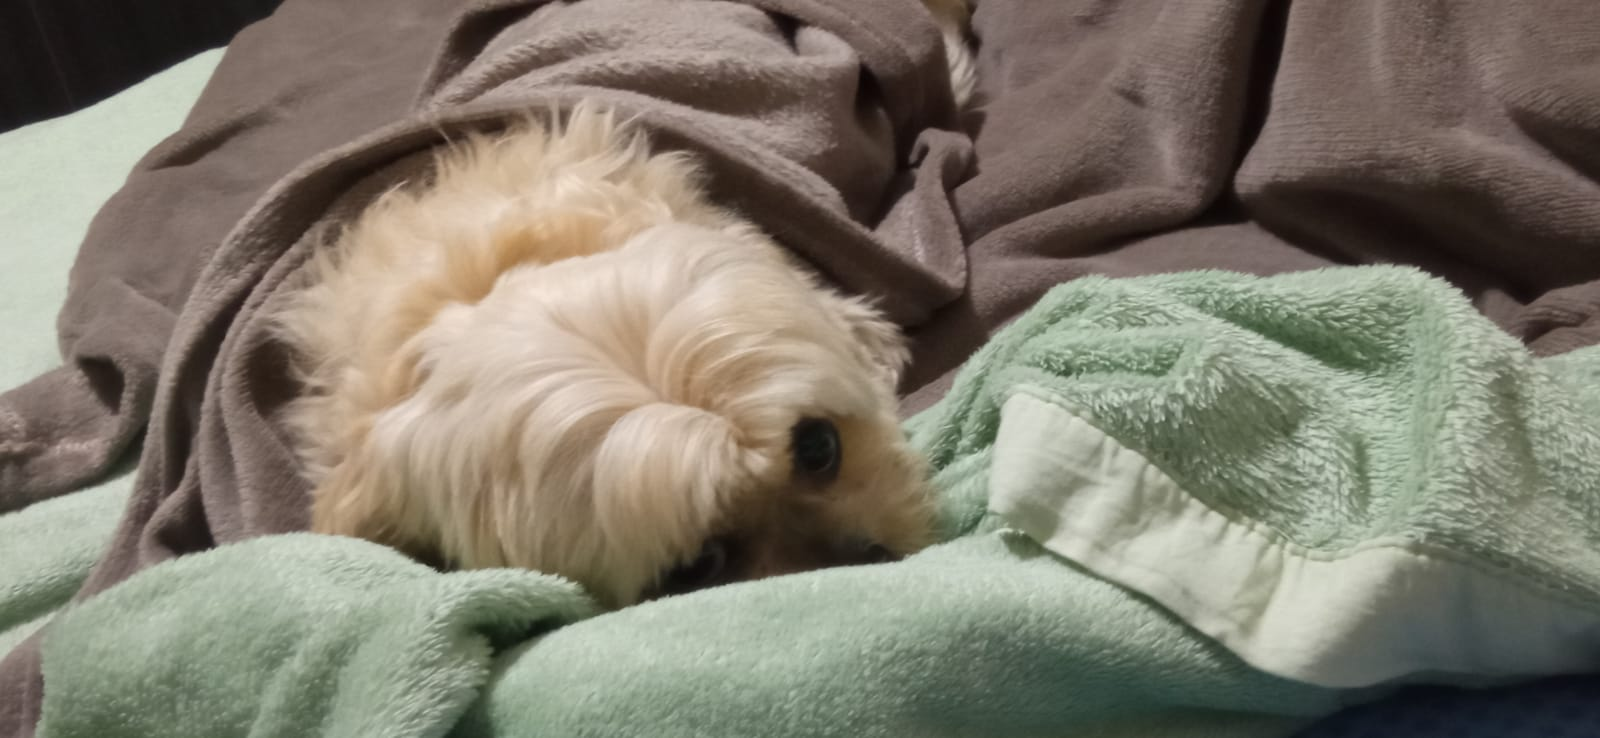

1/1 [==============================] - 0s 87ms/step
Essa imagem representa um cachorro 


In [72]:
input_image_path = input('Coloque aqui o seu arquivo com a sua imagem (jpg ou jpeg)')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)



input_pred_label = np.argmax(input_prediction)



if input_pred_label == 0:
  print('Essa imagem representa um gato')

elif input_pred_label == 1:
  print('Essa imagem representa um cachorro ')

